In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['StudentsPerformance.csv']


> # If you find this notebook helpful , some upvotes would be very much appreciated - That will keep me motivated 👍¶


## The main aim of this kernel is to analyse how are the scores impacted based on different variables which include gender, race, lunch, test preparation course etc...
 ## Each column is picked and has been analysed how they affect the scores. For easy understanding I have used graphs and plots.
## After all visualisation is the best way to understand....
![PIC](https://showmeinstitute.org/sites/default/files/pros-cons-of-standardized-tests-860x420.jpg)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df=pd.read_csv('../input/StudentsPerformance.csv')

In [4]:
df['Total score']=df['math score']+df['reading score']+df['writing score']

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
Total score                    1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [7]:
df['math score']=pd.to_numeric(df['math score'],downcast='float')

In [8]:
print("Average math score is    : {}".format(np.mean(df['math score'])))
print("Average reading score is : {}".format(np.mean(df['reading score'])))
print("Average writing score is : {}".format(np.mean(df['writing score'])))
print("Average total score is   : {}".format(np.mean(df['Total score'])/3))

Average math score is    : 66.08899688720703
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 67.77066666666667


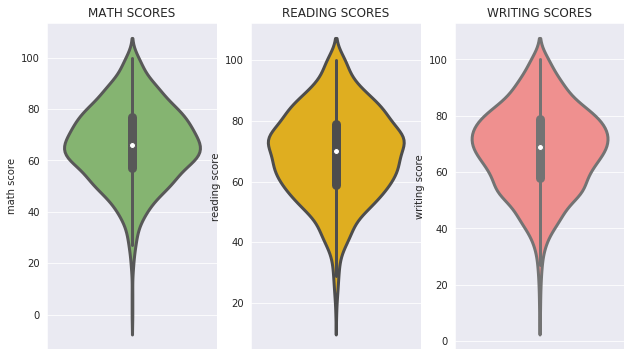

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,palette='summer',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,palette='Wistia_r',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,palette='spring',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

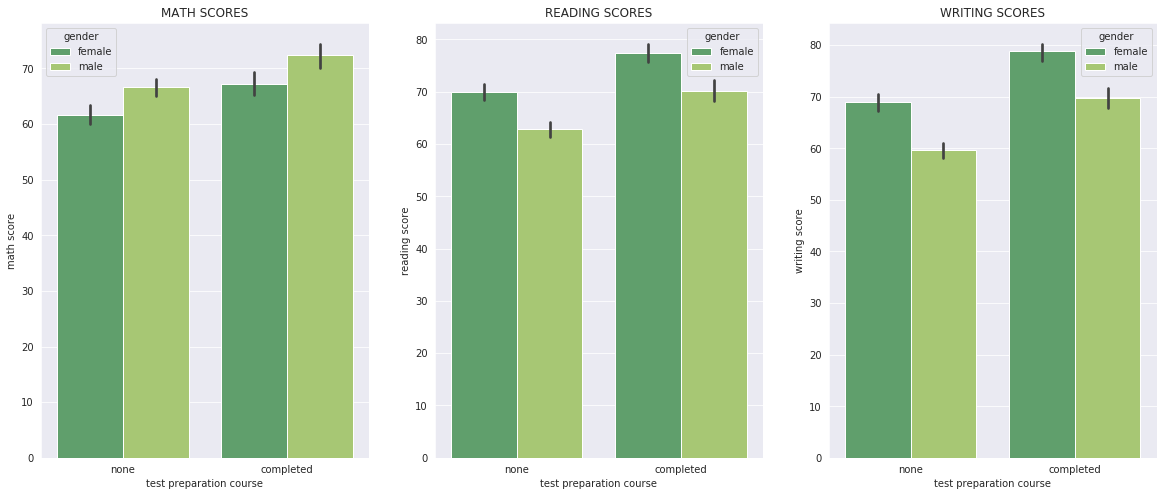

In [10]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender',palette='summer')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',palette='summer')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',palette='summer')
plt.title('WRITING SCORES')
plt.show()

|* From the first plot we can see the math scores of boys are better irrespective of wether they completed the course or no.
* From the next two plots we can see that girls perform more better in reading and writing
* From all three graphs its clear that if the course is completed we can achieve higher scores

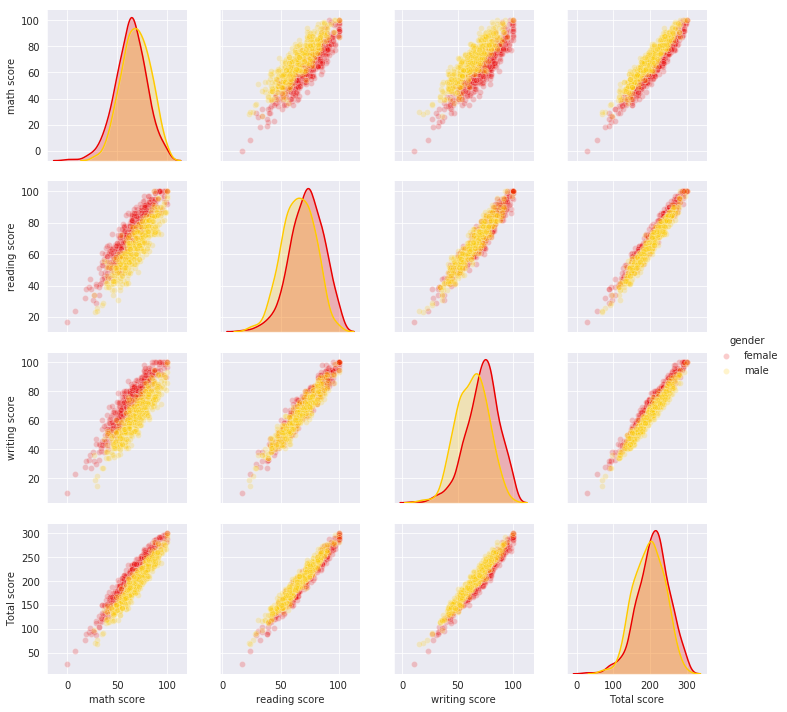

In [11]:
sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.2},palette='hot')

From the above plot it is clear that all the scores increase linearly with each other.

In [12]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

Now lets see how lunch affects the scores 

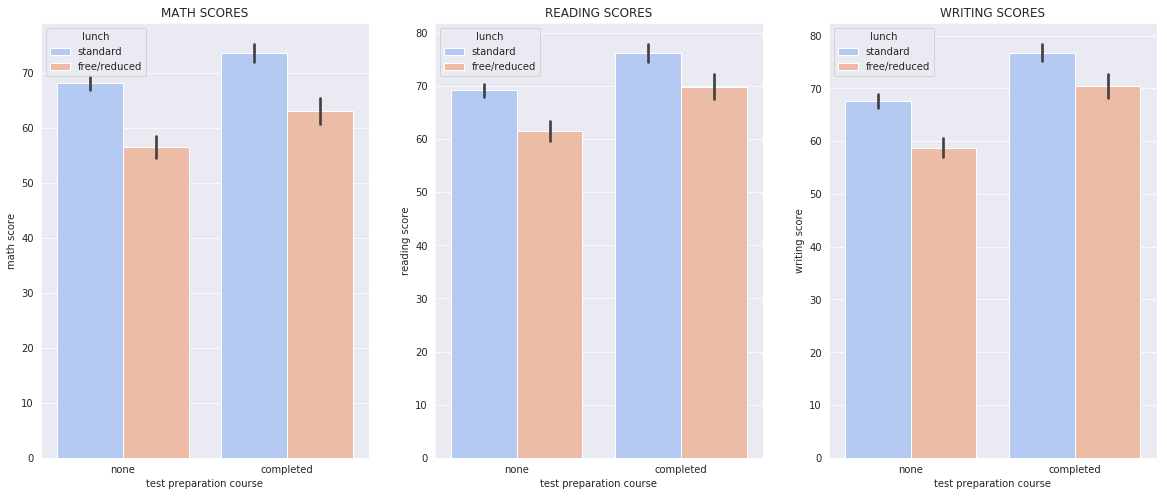

In [13]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='lunch',palette='coolwarm')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='lunch',palette='coolwarm')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='lunch',palette='coolwarm')
plt.title('WRITING SCORES')
plt.show()

In all the cases the scores are higher by having the standard lunch.

**Checking out the toppers.**

In [14]:
df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score']>90)]\
.sort_values(by=['Total score'],ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
962,female,group E,associate's degree,standard,none,100.0,100,100,300
458,female,group E,bachelor's degree,standard,none,100.0,100,100,300
916,male,group E,bachelor's degree,standard,completed,100.0,100,100,300
114,female,group E,bachelor's degree,standard,completed,99.0,100,100,299
179,female,group D,some high school,standard,completed,97.0,100,100,297
712,female,group D,some college,standard,none,98.0,100,99,297
625,male,group D,some college,standard,completed,100.0,97,99,296
165,female,group C,bachelor's degree,standard,completed,96.0,100,100,296
903,female,group D,bachelor's degree,free/reduced,completed,93.0,100,100,293
149,male,group E,associate's degree,free/reduced,completed,100.0,100,93,293


The first two toppers are either **geniuses** or they did some **malpractice**  as their test preparation course was ** none**.

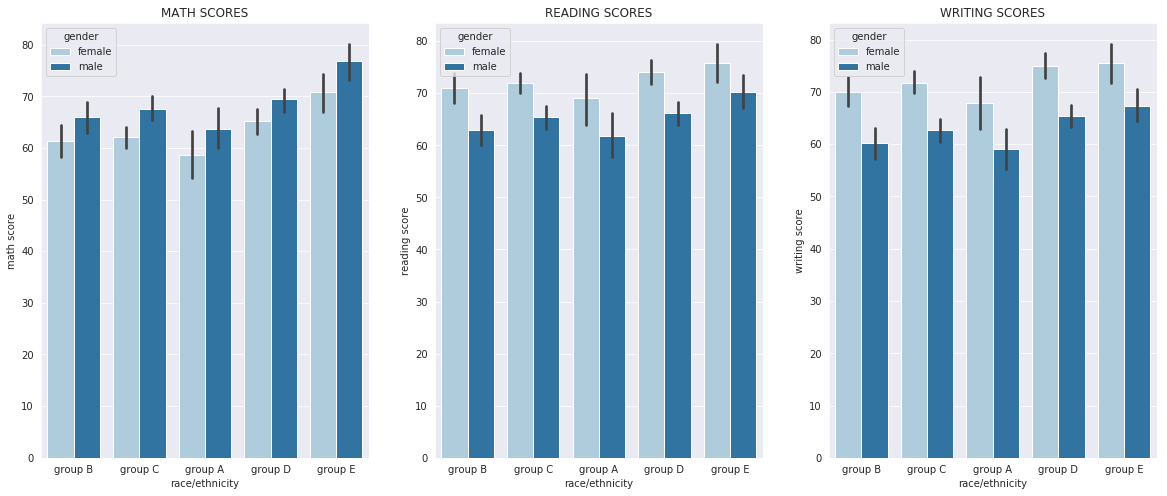

In [15]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender',palette='Paired')
plt.show()

The above plot shows in depth how people score from different groups.

In [16]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total score'],
      dtype='object')

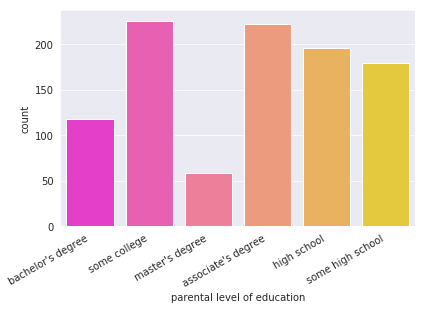

In [17]:
fig,ax=plt.subplots()
sns.countplot(x='parental level of education',data=df,palette='spring')
plt.tight_layout()
fig.autofmt_xdate()

Thw above plot shows most of the parents went to some college or had associate's degree and there are very less people who had higher studies.

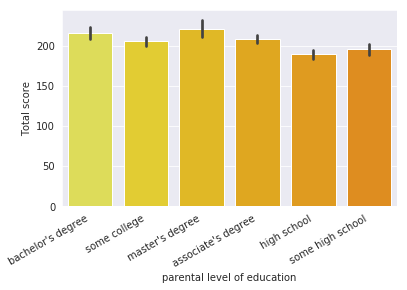

In [18]:
fig,ax=plt.subplots()
sns.barplot(x=df['parental level of education'],y='Total score',data=df,palette='Wistia')
fig.autofmt_xdate()

From the above plot its clear that ** if the parental education is better their children tend to score better in all areas **(math, reading, writing).